Load data

In [ ]:
!pip install causalnex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.3/817.3 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00
  Using cached nvidia_cuda

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
import networkx as nx
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/gokada_data/df_rich.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555717 entries, 0 to 1555716
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1555717 non-null  int64  
 1   order_id          1555717 non-null  int64  
 2   driver_id         1555717 non-null  int64  
 3   driver_action     1555717 non-null  object 
 4   lat               1555717 non-null  float64
 5   lng               1555717 non-null  float64
 6   Trip ID           1555717 non-null  int64  
 7   Trip Origin       1555717 non-null  object 
 8   Trip Destination  1555717 non-null  object 
 9   Trip Start Time   1555717 non-null  object 
 10  Trip End Time     1555717 non-null  object 
 11  Is Holiday        1555717 non-null  bool   
 12  Day of Week       1555717 non-null  int64  
 13  Is Weekend        1555717 non-null  bool   
 14  trip_start_date   1555717 non-null  object 
 15  rain              1555717 non-null  object 
 16  

In [ ]:
df.head()

,id,order_id,driver_id,driver_action,lat,lng,Trip ID,Trip Origin,Trip Destination,Trip Start Time,...,Is Holiday,Day of Week,Is Weekend,trip_start_date,rain,Origin Lat,Origin Lng,Destination Lat,Destination Lng,driver_proximity
0,1,392001,243828,accepted,1.103065,-2.033171,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,...,False,3,False,2021-07-01,no_rain,1.085057,-1.960046,-1.176457,0.108505,8.378837
1,2,392001,243588,rejected,0.934442,-1.714569,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,...,False,3,False,2021-07-01,no_rain,1.085057,-1.960046,-1.176457,0.108505,31.997836
2,3,392001,243830,rejected,1.001765,-1.820782,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,...,False,3,False,2021-07-01,no_rain,1.085057,-1.960046,-1.176457,0.108505,18.029974
3,4,392001,243539,rejected,1.001902,-1.844383,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,...,False,3,False,2021-07-01,no_rain,1.085057,-1.960046,-1.176457,0.108505,15.819918
4,5,392001,171653,rejected,1.220243,-1.689141,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,...,False,3,False,2021-07-01,no_rain,1.085057,-1.960046,-1.176457,0.108505,33.653025


Preparing the Data for Structure Learning



In [ ]:
df["hour"]=df["Trip Start Time"].apply(lambda x: pd.to_datetime(x).hour)
df.drop(columns="Trip Start Time",inplace=True)

In [ ]:
df.head()

,id,order_id,driver_id,driver_action,lat,lng,Trip ID,Trip Origin,Trip Destination,Trip End Time,...,Day of Week,Is Weekend,trip_start_date,rain,Origin Lat,Origin Lng,Destination Lat,Destination Lng,driver_proximity,hour
0,1,392001,243828,accepted,1.103065,-2.033171,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:34:36,...,3,False,2021-07-01,no_rain,1.085057,-1.960046,-1.176457,0.108505,8.378837,9
1,2,392001,243588,rejected,0.934442,-1.714569,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:34:36,...,3,False,2021-07-01,no_rain,1.085057,-1.960046,-1.176457,0.108505,31.997836,9
2,3,392001,243830,rejected,1.001765,-1.820782,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:34:36,...,3,False,2021-07-01,no_rain,1.085057,-1.960046,-1.176457,0.108505,18.029974,9
3,4,392001,243539,rejected,1.001902,-1.844383,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:34:36,...,3,False,2021-07-01,no_rain,1.085057,-1.960046,-1.176457,0.108505,15.819918,9
4,5,392001,171653,rejected,1.220243,-1.689141,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:34:36,...,3,False,2021-07-01,no_rain,1.085057,-1.960046,-1.176457,0.108505,33.653025,9


In [ ]:
df_backup = df.copy()

In [ ]:
import numpy as np

In [ ]:
non_numeric_columns = list(df.select_dtypes(exclude=[np.number]).columns)

print(non_numeric_columns)

['driver_action', 'Trip Origin', 'Trip Destination', 'Trip End Time', 'Is Holiday', 'Is Weekend', 'trip_start_date', 'rain']


In [ ]:
columns=['driver_action', 'Trip Origin', 'Trip Destination', 'Trip End Time', 'Is Holiday', 'Is Weekend', 'rain']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in columns:
    df[col] = le.fit_transform(df[col])

df.head(5)

In [ ]:
df['trip_start_date'] = pd.to_datetime(df['trip_start_date'])

In [ ]:
df.head()

,id,order_id,driver_id,driver_action,lat,lng,Trip ID,Trip Origin,Trip Destination,Trip End Time,...,Is Weekend,trip_start_date,rain,Origin Lat,Origin Lng,Destination Lat,Destination Lng,driver_proximity,hour,date
0,1,392001,243828,0,1.103065,-2.033171,392001,11675,3784,123,...,0,2021-07-01,0,1.085057,-1.960046,-1.176457,0.108505,8.378837,9,2021-07-01
1,2,392001,243588,1,0.934442,-1.714569,392001,11675,3784,123,...,0,2021-07-01,0,1.085057,-1.960046,-1.176457,0.108505,31.997836,9,2021-07-01
2,3,392001,243830,1,1.001765,-1.820782,392001,11675,3784,123,...,0,2021-07-01,0,1.085057,-1.960046,-1.176457,0.108505,18.029974,9,2021-07-01
3,4,392001,243539,1,1.001902,-1.844383,392001,11675,3784,123,...,0,2021-07-01,0,1.085057,-1.960046,-1.176457,0.108505,15.819918,9,2021-07-01
4,5,392001,171653,1,1.220243,-1.689141,392001,11675,3784,123,...,0,2021-07-01,0,1.085057,-1.960046,-1.176457,0.108505,33.653025,9,2021-07-01


In [ ]:
driver_loc=df[["lat","lng"]]
request_loc=df[["Origin Lat","Origin Lng"]]

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    init="random",
    n_clusters=50,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [ ]:
kmeans.fit(driver_loc)
driver_labels = kmeans.labels_

kmeans.fit(request_loc)
request_labels = kmeans.labels_

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7fe5dd8925f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-5007b62f.3.23.dev.so: cannot open shared object file: No such file or directory


In [ ]:
df["driver_loc"]=driver_labels
df["request_loc"]=request_labels

In [ ]:
df.head()

,id,order_id,driver_id,driver_action,lat,lng,Trip ID,Trip Origin,Trip Destination,Trip End Time,...,rain,Origin Lat,Origin Lng,Destination Lat,Destination Lng,driver_proximity,hour,date,driver_loc,request_loc
0,1,392001,243828,0,1.103065,-2.033171,392001,11675,3784,123,...,0,1.085057,-1.960046,-1.176457,0.108505,8.378837,9,2021-07-01,21,41
1,2,392001,243588,1,0.934442,-1.714569,392001,11675,3784,123,...,0,1.085057,-1.960046,-1.176457,0.108505,31.997836,9,2021-07-01,21,41
2,3,392001,243830,1,1.001765,-1.820782,392001,11675,3784,123,...,0,1.085057,-1.960046,-1.176457,0.108505,18.029974,9,2021-07-01,21,41
3,4,392001,243539,1,1.001902,-1.844383,392001,11675,3784,123,...,0,1.085057,-1.960046,-1.176457,0.108505,15.819918,9,2021-07-01,21,41
4,5,392001,171653,1,1.220243,-1.689141,392001,11675,3784,123,...,0,1.085057,-1.960046,-1.176457,0.108505,33.653025,9,2021-07-01,21,41


In [ ]:
# Drop unnecessary columns
df = df.drop(columns=[
    'id',
    'order_id',
    'driver_id',
    'Trip ID',
    'Trip Origin',
    'Trip Destination',
    'lat',
    'lng',
    'Origin Lat',
    'Origin Lng',
    'Destination Lat',
    'Destination Lng'
])
df.head()

,driver_action,Trip End Time,Is Holiday,Day of Week,Is Weekend,trip_start_date,rain,driver_proximity,hour,date,driver_loc,request_loc
0,0,123,0,3,0,2021-07-01,0,8.378837,9,2021-07-01,21,41
1,1,123,0,3,0,2021-07-01,0,31.997836,9,2021-07-01,21,41
2,1,123,0,3,0,2021-07-01,0,18.029974,9,2021-07-01,21,41
3,1,123,0,3,0,2021-07-01,0,15.819918,9,2021-07-01,21,41
4,1,123,0,3,0,2021-07-01,0,33.653025,9,2021-07-01,21,41


In [ ]:
df = df.drop(columns=[
    'Trip End Time',
    'trip_start_date'
])
df.head()

,driver_action,Is Holiday,Day of Week,Is Weekend,rain,driver_proximity,hour,date,driver_loc,request_loc
0,0,0,3,0,0,8.378837,9,2021-07-01,21,41
1,1,0,3,0,0,31.997836,9,2021-07-01,21,41
2,1,0,3,0,0,18.029974,9,2021-07-01,21,41
3,1,0,3,0,0,15.819918,9,2021-07-01,21,41
4,1,0,3,0,0,33.653025,9,2021-07-01,21,41


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df[['driver_proximity']] = scaler.fit_transform(df[['driver_proximity']])

In [ ]:
df.head()

,driver_action,Is Holiday,Day of Week,Is Weekend,rain,driver_proximity,hour,date,driver_loc,request_loc
0,0,0,3,0,0,-1.288458,9,2021-07-01,21,41
1,1,0,3,0,0,-0.018184,9,2021-07-01,21,41
2,1,0,3,0,0,-0.769402,9,2021-07-01,21,41
3,1,0,3,0,0,-0.888263,9,2021-07-01,21,41
4,1,0,3,0,0,0.070835,9,2021-07-01,21,41


In [ ]:
non_numeric_columns = list(df.select_dtypes(exclude=[np.number]).columns)

print(non_numeric_columns)

['date']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in non_numeric_columns:
    df[col] = le.fit_transform(df[col])

df.head(5)

,driver_action,Is Holiday,Day of Week,Is Weekend,rain,driver_proximity,hour,date,driver_loc,request_loc
0,0,0,3,0,0,-1.288458,9,0,21,41
1,1,0,3,0,0,-0.018184,9,0,21,41
2,1,0,3,0,0,-0.769402,9,0,21,41
3,1,0,3,0,0,-0.888263,9,0,21,41
4,1,0,3,0,0,0.070835,9,0,21,41


In [ ]:
df_subset = df.sample(n=1000, random_state=42)

Causal learning

In [ ]:
sm = from_pandas(df_subset)

In [ ]:
from IPython.display import Image

In [ ]:
!pip install graphviz

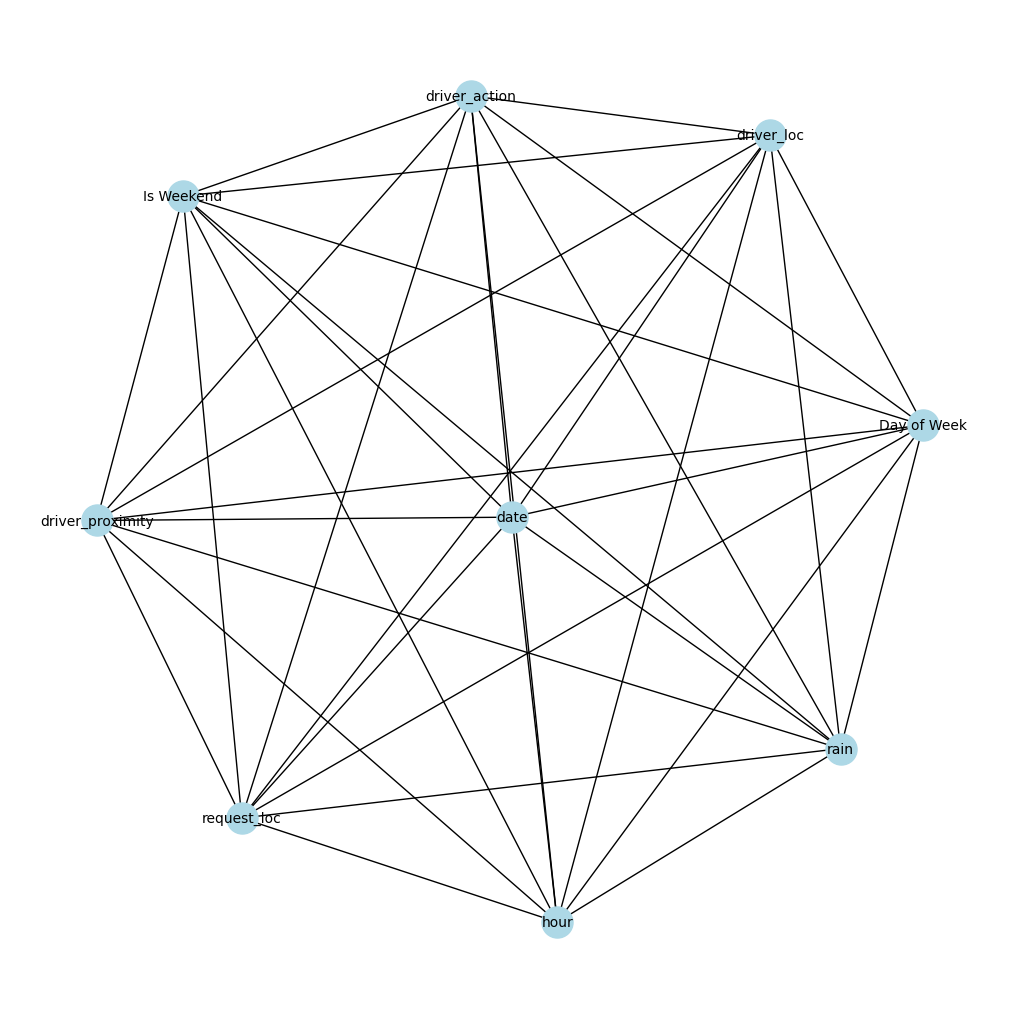

In [ ]:
import matplotlib.pyplot as plt
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import networkx as nx

viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)

edges = [(edge['from'], edge['to']) for edge in viz.edges]
nx_graph = nx.Graph()
nx_graph.add_edges_from(edges)

plt.figure(figsize=(10, 10))
nx.draw(nx_graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.show()

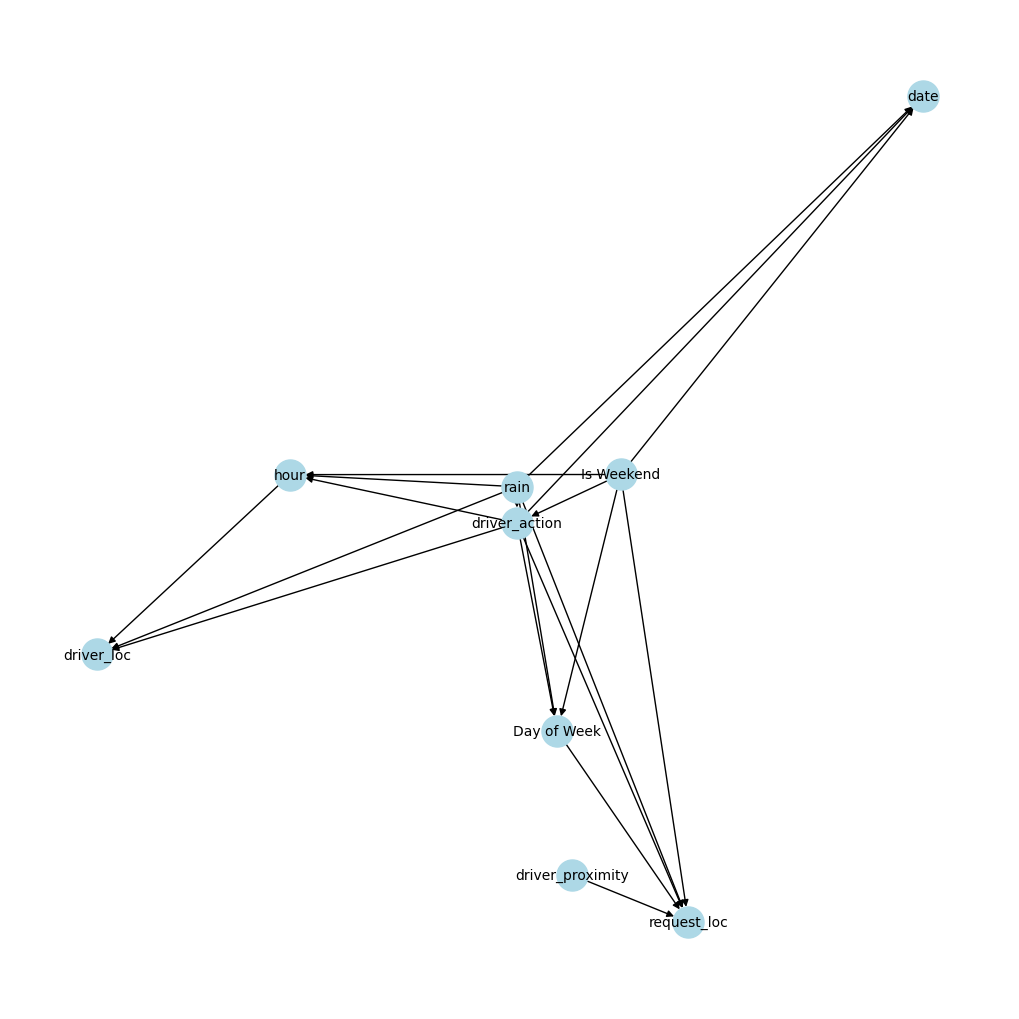

In [ ]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)

edges = [(edge['from'], edge['to']) for edge in viz.edges]
nx_graph = nx.DiGraph()
nx_graph.add_edges_from(edges)
plt.figure(figsize=(10, 10))
nx.draw(nx_graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.show()

In [ ]:
df_subset1 = df.sample(n=2000, random_state=42)

In [ ]:
sm = from_pandas(df_subset1)

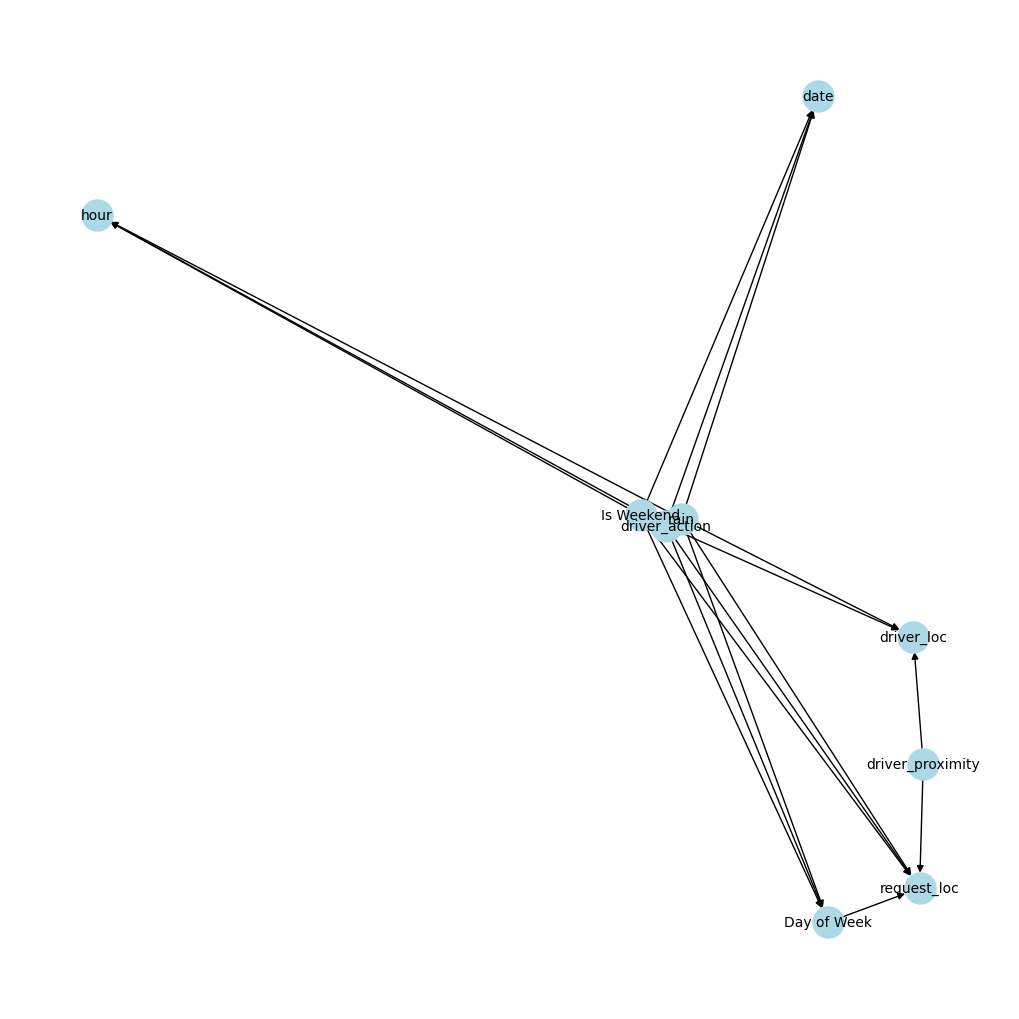

In [ ]:
import matplotlib.pyplot as plt
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import networkx as nx

sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)

edges = [(edge['from'], edge['to']) for edge in viz.edges]
nx_graph = nx.DiGraph()
nx_graph.add_edges_from(edges)

plt.figure(figsize=(10, 10))
nx.draw(nx_graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.show()

In [ ]:
sm.edges

OutEdgeView([('driver_action', 'Day of Week'), ('driver_action', 'hour'), ('driver_action', 'date'), ('driver_action', 'driver_loc'), ('driver_action', 'request_loc'), ('Day of Week', 'request_loc'), ('Is Weekend', 'driver_action'), ('Is Weekend', 'Day of Week'), ('Is Weekend', 'hour'), ('Is Weekend', 'date'), ('Is Weekend', 'request_loc'), ('rain', 'driver_action'), ('rain', 'Day of Week'), ('rain', 'hour'), ('rain', 'date'), ('rain', 'driver_loc'), ('rain', 'request_loc'), ('driver_proximity', 'driver_loc'), ('driver_proximity', 'request_loc')])

subset 100k of the data

In [ ]:
df_sample = df.sample(n=100000, random_state=42)

split into test and train data

In [ ]:
train_df, test_df = train_test_split(df_sample, test_size=0.2, random_state=42)

ground truth causal graph

In [ ]:
sm = from_pandas(train_df)

In [ ]:
sm.edges

OutEdgeView([('driver_action', 'Day of Week'), ('driver_action', 'Is Weekend'), ('driver_action', 'rain'), ('driver_action', 'driver_proximity'), ('driver_action', 'hour'), ('driver_action', 'date'), ('driver_action', 'driver_loc'), ('driver_action', 'request_loc'), ('Day of Week', 'driver_action'), ('Day of Week', 'Is Weekend'), ('Day of Week', 'rain'), ('Day of Week', 'driver_proximity'), ('Day of Week', 'hour'), ('Day of Week', 'date'), ('Day of Week', 'driver_loc'), ('Day of Week', 'request_loc'), ('Is Weekend', 'driver_action'), ('Is Weekend', 'Day of Week'), ('Is Weekend', 'rain'), ('Is Weekend', 'driver_proximity'), ('Is Weekend', 'hour'), ('Is Weekend', 'date'), ('Is Weekend', 'driver_loc'), ('Is Weekend', 'request_loc'), ('rain', 'driver_action'), ('rain', 'Day of Week'), ('rain', 'Is Weekend'), ('rain', 'driver_proximity'), ('rain', 'hour'), ('rain', 'date'), ('rain', 'driver_loc'), ('rain', 'request_loc'), ('driver_proximity', 'driver_action'), ('driver_proximity', 'Day of W

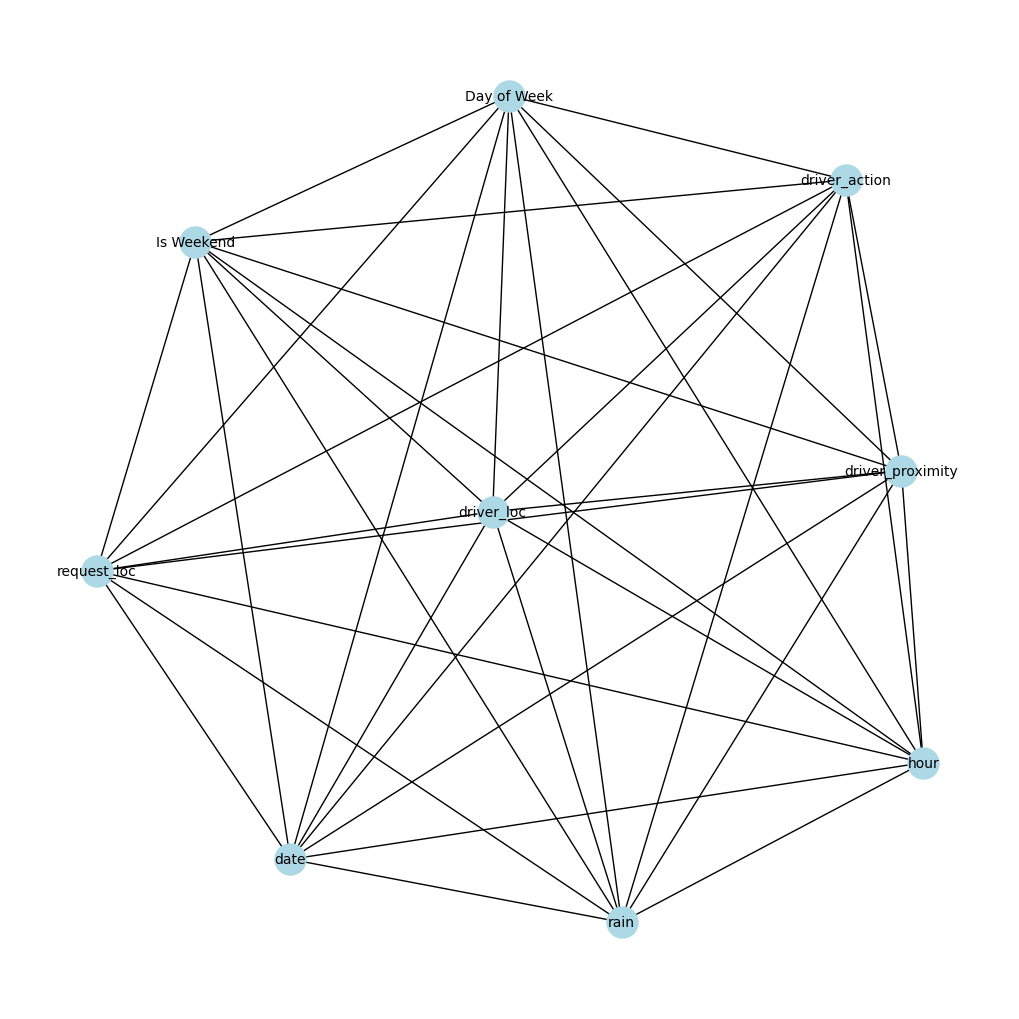

In [ ]:
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)

edges = [(edge['from'], edge['to']) for edge in viz.edges]
nx_graph = nx.Graph()
nx_graph.add_edges_from(edges)

plt.figure(figsize=(10, 10))
nx.draw(nx_graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.show()

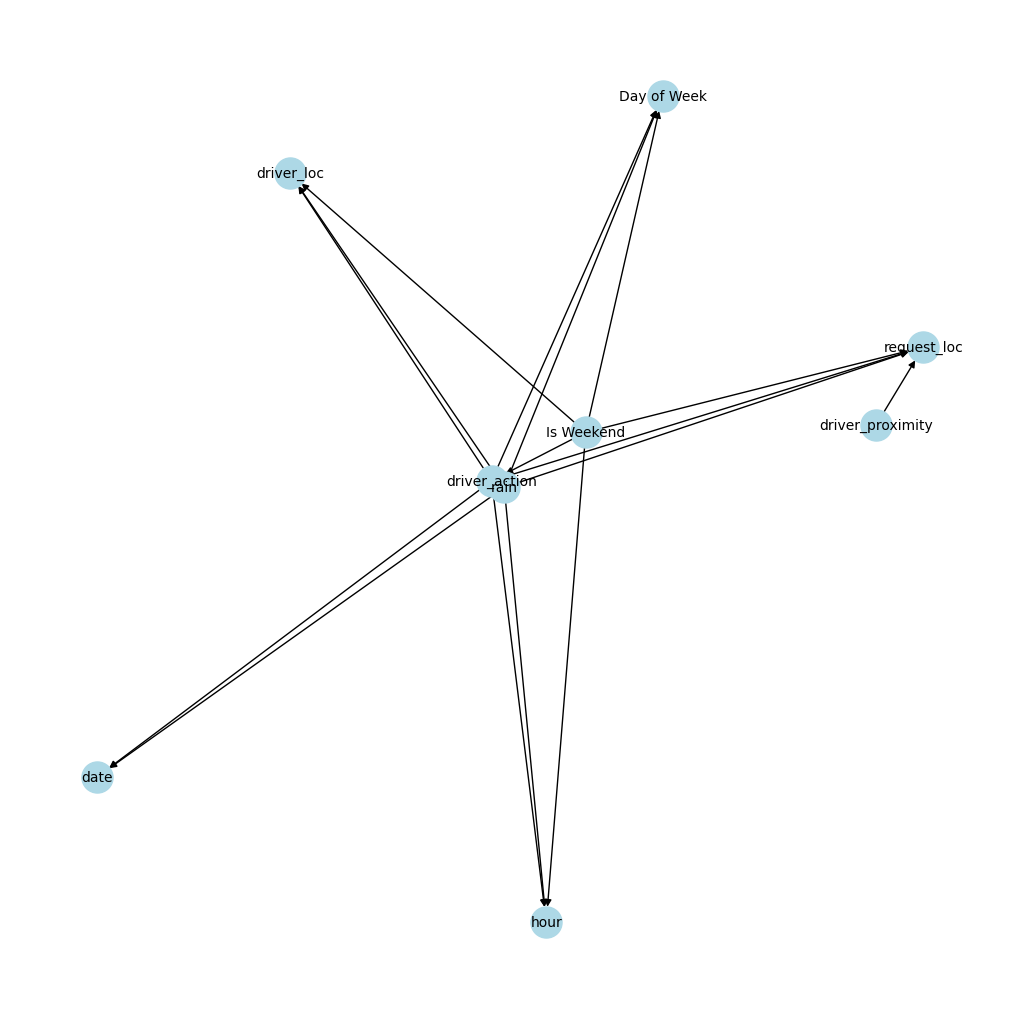

In [ ]:
import matplotlib.pyplot as plt
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import networkx as nx

sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)

edges = [(edge['from'], edge['to']) for edge in viz.edges]
nx_graph = nx.DiGraph()
nx_graph.add_edges_from(edges)

plt.figure(figsize=(10, 10))
nx.draw(nx_graph, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import jaccard_score

# Function to create causal graph and convert to edge set
def create_causal_graph(data):
    sm = from_pandas(data)
    edges = set(sm.edges())
    return edges

# Function to calculate Jaccard similarity
def jaccard_similarity(edges1, edges2):
    intersection = len(edges1.intersection(edges2))
    union = len(edges1.union(edges2))
    return intersection / union

# Ground truth graph
ground_truth_edges = create_causal_graph(train_df)

fractions = np.linspace(0.1, 1.0, 10)
similarities = []

for frac in fractions:
    sample_data = train_df.sample(frac=frac, random_state=42)
    sample_edges = create_causal_graph(sample_data)
    similarity = jaccard_similarity(ground_truth_edges, sample_edges)
    similarities.append(similarity)

print("Jaccard Similarities:", similarities)


Jaccard Similarities: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
